In [1]:

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#read csv
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#check first rows
print('type:', type(train_df))
print('shape:', train_df.shape)


type: <class 'pandas.core.frame.DataFrame'>
shape: (891, 12)


In [4]:
#check data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#get first rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(train_df.columns)

12

In [ ]:
#get numerical columns
num_cols = train_df.select_dtypes(['int64', 'float64']).drop(columns='PassengerId')
print('number of columns:', len(num_cols.columns))
num_cols.head()

number of columns: 6


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [21]:
#get categorical features
cat_cols = train_df.select_dtypes('object').drop(columns='Name')
print('number of columns:', len(cat_cols.columns))
cat_cols.head()

number of columns: 4


,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


In [23]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
num_cols.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [36]:
print('mean:', train_df['Age'].mean())
print('median:', train_df['Age'].median())

mean: 29.69911764705882
median: 28.0


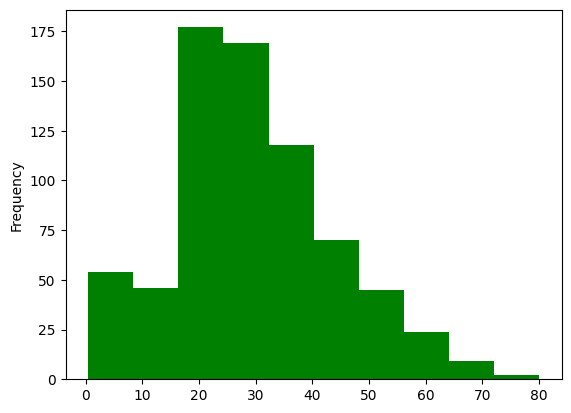

In [34]:
train_df['Age'].plot(kind='hist', color='green');

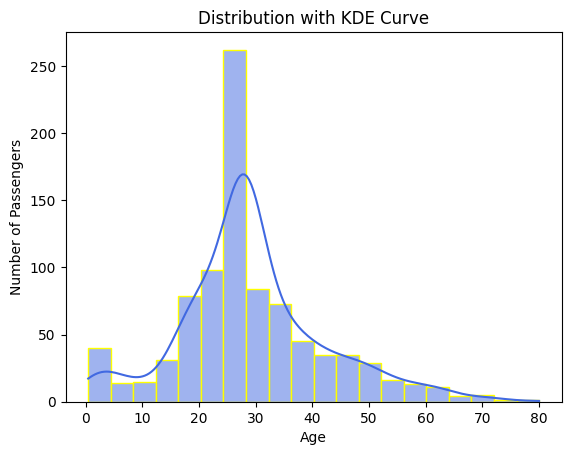

In [ ]:
#fill missing values in numerical variables
num_cols['Age'] = num_cols['Age'].fillna(num_cols['Age'].median())
sns.histplot(num_cols['Age'], color='royalblue', edgecolor='yellow', kde=True, bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution with KDE Curve');


In [56]:
cat_cols.isnull().sum()

Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#fill missing values in categorical variables 
cat_cols['Cabin']= cat_cols['Cabin'].fillna(cat_cols['Cabin'].mode()[0])
cat_cols['Embarked'] = cat_cols['Embarked'].fillna(cat_cols['Embarked'].mode()[0])
cat_cols.head(20)

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,B96 B98,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,B96 B98,S
3,female,113803,C123,S
4,male,373450,B96 B98,S
5,male,330877,B96 B98,Q
6,male,17463,E46,S
7,male,349909,B96 B98,S
8,female,347742,B96 B98,S
9,female,237736,B96 B98,C


In [69]:
cat_cols.isnull().sum()

Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [72]:
#get dummies
cat_cols_dum= pd.get_dummies(cat_cols, drop_first=True).astype('int')
cat_cols_dum.head()

,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
print('Shape of cat without dummies:', cat_cols.shape)
print('Shape of cat with dummies:', cat_cols_dum.shape)

Shape of cat without dummies: (891, 4)
Shape of cat with dummies: (891, 829)
